In [14]:
import numpy as np
import matplotlib.pyplot as plt
from lab_utils_uni import plt_intuition, plt_stationary, plt_update_onclick, soup_bowl
plt.style.use('./deeplearning.mplstyle')

In [15]:
# x_train is the input variable (size in 100 square meter)
# y_train is the target (price in 1000s of turkish lira)
x_train = np.array([1.0, 2.0, 3.0, 5.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 0.5, 1.0, 1.5, 2.5, 0.8, 1.8, 3.0, 4.0, 5.5, 6.5, 7.0, 7.5])
y_train = np.array([500.0, 2000.0, 3000.0, 10000.0, 1500.0, 5000.0, 8000.0, 12000.0, 15000.0, 20000.0, 100.0, 800.0, 1200.0, 3500.0, 900.0, 2500.0, 4000.0, 6000.0, 8500.0, 9000.0, 9500.0, 10000.0])
print(f"x_train = {x_train}")
print(f"y_train = {y_train}")

x_train = [ 1.   2.   3.   5.   2.   4.   6.   8.  10.  12.   0.5  1.   1.5  2.5
  0.8  1.8  3.   4.   5.5  6.5  7.   7.5]
y_train = [  500.  2000.  3000. 10000.  1500.  5000.  8000. 12000. 15000. 20000.
   100.   800.  1200.  3500.   900.  2500.  4000.  6000.  8500.  9000.
  9500. 10000.]


In [16]:
# m is the number of training examples
print(f"x_train.shape: {x_train.shape}")
m = x_train.shape[0]
print(f"Number of training examples is: {m}")

x_train.shape: (22,)
Number of training examples is: 22


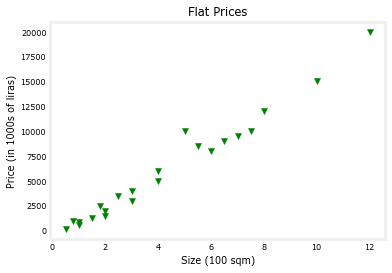

In [17]:
# Plot the data points
plt.scatter(x_train, y_train, marker='v', c='g')
# Set the title
plt.title("Flat Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of liras)')
# Set the x-axis label
plt.xlabel('Size (100 sqm)')
plt.show()

In [18]:
w = 1700
b = -1400
print(f"w: {w}")
print(f"b: {b}")

w: 1700
b: -1400


In [19]:
def compute_model_output(x, w, b):
    """
    Computes the prediction of a linear model
    Args:
      x (ndarray (m,)): Data, m examples 
      w,b (scalar)    : model parameters  
    Returns
      f_wb (ndarray (m,)): model prediction
    """
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b
        
    return f_wb

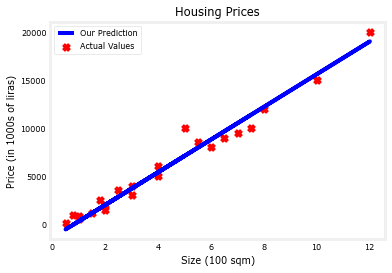

In [20]:
tmp_f_wb = compute_model_output(x_train, w, b,)

# Plot our model prediction
plt.plot(x_train, tmp_f_wb, c='b',label='Our Prediction')

# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')

# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of liras)')
# Set the x-axis label
plt.xlabel('Size (100 sqm)')
plt.legend()
plt.show()

In [21]:

#write a code that generates random number between 0 and 10
#need for loop code
for i in range(10):
    x_i = np.random.randint(1,10)
    cost_550sqft = w * x_i + b    
    print(f"{cost_550sqft:.0f}k ₺ is the estimate price for your {x_i} sqm house.")


12200k ₺ is the estimate price for your 8 sqm house.
7100k ₺ is the estimate price for your 5 sqm house.
300k ₺ is the estimate price for your 1 sqm house.
5400k ₺ is the estimate price for your 4 sqm house.
13900k ₺ is the estimate price for your 9 sqm house.
2000k ₺ is the estimate price for your 2 sqm house.
10500k ₺ is the estimate price for your 7 sqm house.
13900k ₺ is the estimate price for your 9 sqm house.
5400k ₺ is the estimate price for your 4 sqm house.
8800k ₺ is the estimate price for your 6 sqm house.


In [22]:
def compute_cost(x, y, w, b): 
    """
    Computes the cost function for linear regression.
    
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    
    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    # number of training examples
    m = x.shape[0] 
    
    cost_sum = 0 
    for i in range(m): 
        f_wb = w * x[i] + b   
        cost = (f_wb - y[i]) ** 2  
        cost_sum = cost_sum + cost  
    total_cost = (1 / (2 * m)) * cost_sum  

    return total_cost

print(f"Cost for w = 1700, b = -1400 is {compute_cost(x_train, y_train, w, b):.2f}")

Cost for w = 1700, b = -1400 is 410777.27


In [23]:
plt_intuition(x_train,y_train)

interactive(children=(IntSlider(value=150, description='w', max=4000, step=10), Output()), _dom_classes=('widg…

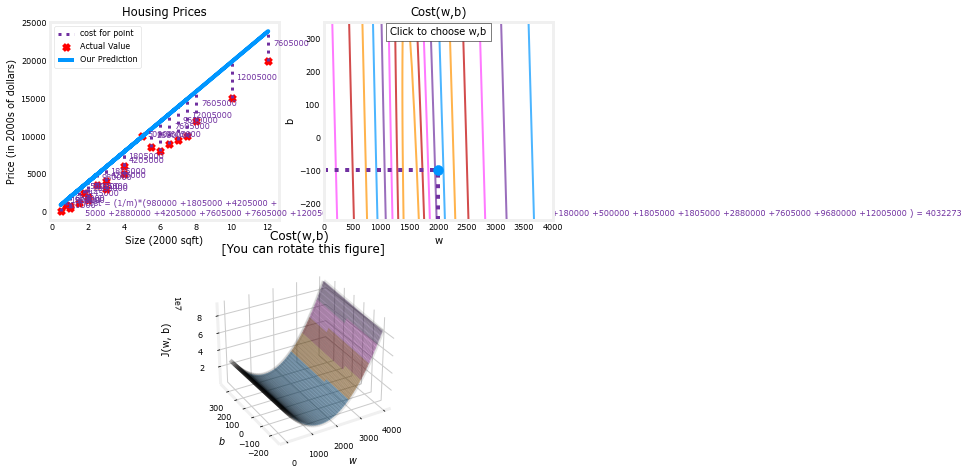

In [24]:
plt.close('all') 
fig, ax, dyn_items = plt_stationary(x_train, y_train)
updater = plt_update_onclick(fig, ax, x_train, y_train, dyn_items)